In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet 

import string
import re
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')


%matplotlib inline

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\vinh.nt2\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinh.nt2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\vinh.nt2\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vinh.nt2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def process_tweet(tweet):
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = nltk.pos_tag(tokenizer.tokenize(tweet))

    tweets_clean = []
    for word in tweet_tokens:
        if word[0] not in string.punctuation:
            stem_word = lemmatizer.lemmatize(word[0], pos_tag_convert(word[1]))
            tweets_clean.append(stem_word)

    return tweets_clean

def pos_tag_convert(nltk_tag: str) -> str:
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [4]:
df = pd.read_excel('C:\\Users\\vinh.nt2\\Downloads\\Comment_Analysis\\Data\\Data training\\Data_traing_spilt_comment\\train_category\\train_category_sentiment_origin.xlsx')
df = df.reset_index()
df

,index,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,comment,sentiment_manual,category,category_sentiment
0,0,0.0,0.0,0,thick elastic,1.0,Sản phẩm và chất lượng,Sản phẩm và chất lượng_1
1,1,1.0,1.0,1,zipper bag,1.0,Sản phẩm và chất lượng,Sản phẩm và chất lượng_1
2,2,2.0,2.0,2,"Every time the size is small, the shop changes...",0.0,Phản hồi và giao tiếp,Phản hồi và giao tiếp_0
3,3,3.0,3.0,3,thick pants,1.0,Sản phẩm và chất lượng,Sản phẩm và chất lượng_1
4,4,4.0,4.0,4,Received the item,1.0,Đóng gói và giao hàng,Đóng gói và giao hàng_1
...,...,...,...,...,...,...,...,...
8728,8728,8728.0,8728.0,8728,I accidentally clicked receive so I can't exch...,0.0,Trả hàng/hoàn tiền,Trả hàng/hoàn tiền_0
8729,8729,8729.0,8729.0,8729,Ask for money back without saying anything!,0.0,Trả hàng/hoàn tiền,Trả hàng/hoàn tiền_0
8730,8730,8730.0,8730.0,8730,Does the shop support me to exchange the product?,0.0,Trả hàng/hoàn tiền,Trả hàng/hoàn tiền_0
8731,8731,NaN,NaN,8731,NaN,NaN,NaN,NaN


In [7]:
df.drop(columns={'Unnamed: 0.2'}, inplace = True)

In [8]:
all_positive_tweets = df[df['sentiment_manual'] == 1]['comment']
all_negative_tweets = df[df['sentiment_manual'] == 0]['comment']

all_positive_tweets = all_positive_tweets.reset_index(drop=True)
all_negative_tweets = all_negative_tweets.reset_index(drop=True)

print(f"The number of positive tweets: {len(all_positive_tweets)}")
print(f"The number of negative tweets: {len(all_negative_tweets)}")

The number of positive tweets: 6403
The number of negative tweets: 2328


In [9]:
tweet_number = 5
print('Positive tweet example:')
print(all_positive_tweets[tweet_number])
print('\nNegative tweet example:')
print(all_negative_tweets[tweet_number])

Positive tweet example:
right color

Negative tweet example:
they still feel tight


In [10]:
all_positive_tweets_processed = [process_tweet(tweet) for tweet in all_positive_tweets]
all_negative_tweets_processed = [process_tweet(tweet) for tweet in all_negative_tweets]

In [11]:
tweet_number = 4
print('Positive processed tweet example:')
print(all_positive_tweets_processed[tweet_number])
print('\nNegative processed tweet example:')
print(all_negative_tweets_processed[tweet_number])

Positive processed tweet example:
['shop', 'pack', 'quickly']

Negative processed tweet example:
['these', 'pant', 'be', 'design', 'with', 'a', 'slim', 'fit', 'so', 'even', 'if', 'you', 'go', 'up', '2', 'size']


In [12]:
X = all_positive_tweets_processed + all_negative_tweets_processed
y = [[1] for _ in all_positive_tweets_processed] + [[0] for _ in all_negative_tweets_processed]

from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"There are {len(train_x)} sentences for training.")
print(f"There are {len(train_y)} labels for training.\n")
print(f"There are {len(val_x)} sentences for validation.")
print(f"There are {len(val_y)} labels for validation.")

There are 6984 sentences for training.
There are 6984 labels for training.

There are 1747 sentences for validation.
There are 1747 labels for validation.


In [13]:
def build_vocabulary(corpus):
    vocab = {'': 0, '[UNK]': 1}

    for tweet in corpus:
        for word in tweet:
            if word not in vocab:
                vocab[word] = len(vocab)

    return vocab

vocab = build_vocabulary(train_x)
num_words = len(vocab)

print(f"Vocabulary contains {num_words} words\n")
print(vocab)

Vocabulary contains 2102 words

{'': 0, '[UNK]': 1, 'the': 2, 'fabric': 3, 'shrink': 4, 'and': 5, 'be': 6, 'very': 7, 'uncomfortable': 8, 'to': 9, 'wear': 10, 'this': 11, 'my': 12, 'first': 13, 'time': 14, 'buy': 15, 'online': 16, 'i': 17, 'satisfied': 18, 'no': 19, 'need': 20, 'decrease': 21, 'or': 22, 'increase': 23, 'weight': 24, '68kg': 25, 'good': 26, 'quality': 27, 'thin': 28, 'like': 29, 'cool': 30, 'thick': 31, 'right': 32, 'size': 33, 'fast': 34, 'delivery': 35, 'more': 36, 'beautiful': 37, 'than': 38, 'picture': 39, 'seam': 40, 'definitely': 41, 'not': 42, 'just': 43, 'redundant': 44, 'nothing': 45, 'a': 46, 'pile': 47, 'of': 48, 'rag': 49, 'suitable': 50, 'for': 51, 'sport': 52, 'you': 53, 'should': 54, 'it': 55, 'shirt': 56, 'too': 57, 'big': 58, 'soft': 59, 'cloth': 60, 'but': 61, '2': 62, 'set': 63, 'shop': 64, 'only': 65, 'send': 66, 'me': 67, '1': 68, 'wash': 69, 'already': 70, 'fade': 71, 'hot': 72, 'weather': 73, 'collar': 74, 'wide': 75, 'give': 76, '5': 77, 'star': 

In [ ]:
import json

with open('vocab.json', 'w') as f:
    json.dump({'vocab': vocab, 'max_len': max_len}, f)

with open('vocab.json', 'r') as f:
    data = json.load(f)
    vocab_loaded = data['vocab']
    max_len_loaded = data['max_len']

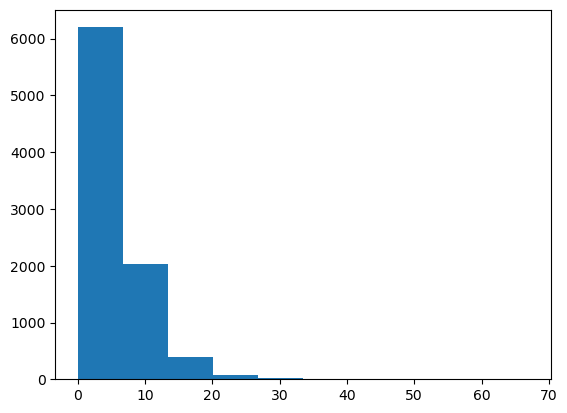

In [15]:
plt.hist([len(t) for t in train_x + val_x]);

In [16]:
def max_length(training_x, validation_x):

    max_len = -1
    for tweet in training_x:
        if max_len < len(tweet): max_len = len(tweet)

    for tweet in validation_x:
        if max_len < len(tweet): max_len = len(tweet)

    return max_len

max_len = max_length(train_x, val_x)
print(f'The length of the longest tweet is {max_len} tokens.')

The length of the longest tweet is 67 tokens.


In [17]:
def padded_sequence(tweet, vocab_dict, max_len, unk_token='[UNK]'):
    unk_ID = vocab_dict[unk_token]
    tensor_l = []

    for word in tweet:

        word_ID = vocab_dict[word] if word in vocab_dict else unk_ID
        tensor_l.append(word_ID)

    padded_tensor = tensor_l + [0] * (max_len - len(tensor_l))

    return padded_tensor

In [18]:
train_x_padded = [padded_sequence(x, vocab, max_len) for x in train_x]
val_x_padded = [padded_sequence(x, vocab, max_len) for x in val_x]

### MÔ HÌNH

In [19]:
train_x_prepared = np.array(train_x_padded)
val_x_prepared = np.array(val_x_padded)

train_y_prepared = np.array(train_y)
val_y_prepared = np.array(val_y)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam

def create_model(lstm_units=64, num_lstm_layers=1, learning_rate=0.001):
    model = Sequential()
    embedding_dim = 16
    model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len))

    for _ in range(num_lstm_layers):
        model.add(LSTM(lstm_units, return_sequences=True))
        model.add(Dropout(0.5))

    model.add(GlobalAveragePooling1D())
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [21]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    embedding_dim = 16
    model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len))

    for _ in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(LSTM(hp.Int('lstm_units', 32, 128, step=32), return_sequences=True))
        model.add(Dropout(0.5))

    model.add(GlobalAveragePooling1D())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        metrics=['accuracy']
    )
    return model

base_dir = r'C:\\Users\\vinh.nt2\\Downloads\\sentiment_NK'
project_name = 'intro_to_kt'
directory = os.path.join(base_dir, project_name)

if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")
else:
    print(f"Directory already exists: {directory}")

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory=base_dir,
    project_name=project_name
)

tuner.search(train_x_prepared, train_y_prepared, epochs=40, validation_data=(val_x_prepared, val_y_prepared))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:")
print(f"LSTM units: {best_hps.get('lstm_units')}")
print(f"Number of LSTM layers: {best_hps.get('num_lstm_layers')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

Trial 10 Complete [00h 05m 33s]
val_accuracy: 0.8740698099136353

Best val_accuracy So Far: 0.8746422529220581
Total elapsed time: 00h 52m 40s
Best hyperparameters found:
LSTM units: 96
Number of LSTM layers: 1
Learning rate: 0.0004918694064742597


In [22]:
best_model = tuner.get_best_models(num_models=1)[0]

loss, accuracy = best_model.evaluate(val_x_prepared, val_y_prepared, verbose=2)
print(f"Test accuracy: {accuracy:.4f}")


c:\Users\vinh.nt2\AppData\Local\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


55/55 - 1s - 14ms/step - accuracy: 0.8746 - loss: 0.3691
Test accuracy: 0.8746


In [69]:
model = best_model

In [72]:
columns = list(range(1, len(train_x_padded[0]) + 1))
df = pd.DataFrame(train_x_padded + val_x_padded, columns=columns)

In [84]:
df['sentiment'] = train_y + val_y
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == [1] else x)
df['sentiment'] = df['sentiment'].apply(lambda x: 0 if x == [0] else x)
df

,1,2,3,4,5,6,7,8,9,10,...,60,61,62,63,64,65,66,67,68,sentiment
0,2,3,4,5,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9,10,11,12,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13,15,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2188,85,25,136,137,89,92,93,727,23,44,...,0,0,0,0,0,0,0,0,0,1
2189,357,154,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2190,31,135,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<a name="4-1"></a>
### 4.1 - Predict on Data

In [74]:
def get_prediction_from_tweet(tweet, model, vocab, max_len):
    tweet = process_tweet(tweet)
    tweet = padded_sequence(tweet, vocab, max_len)
    tweet = np.array([tweet])

    prediction = model.predict(tweet, verbose=False)

    return prediction[0][0]

### _CHUẨN BỊ DỮ LIỆU CẦN SENTIMENT_

In [ ]:
df = pd.read_excel('C:\\Users\\vinh.nt2\\Downloads\\test_split.xlsx')
df.dropna(subset=['comment'], inplace=True)
df = df.reset_index(drop=True)
comments = df['comment']
for idx, comment in enumerate(comments):
    if('\n\n' in comment):
        comment = comment.split('\n\n')[1]
        comments[idx] = comment
df

In [95]:
X_prediction = df['comment_eng']
X_prediction

0                                          fast delivery
1                                       Packed carefully
2                                    buy at shop 3 times
3                             shopee mall so very secure
4                       Shop replies to messages quickly
                             ...                        
267                                           torn apart
268     Dirty and dusty all over other people's products
269    Is it funny to have to carry two bags of MSG i...
270                                       Poor packaging
271                            K shockproof cover always
Name: comment_eng, Length: 272, dtype: object

### _SENTIMENT_

In [96]:
res = []
for comment in X_prediction:
    res.append(get_prediction_from_tweet(comment, model, vocab, max_len))

In [97]:
df['sentiment_pred2'] = res
df.to_excel('C:\\Users\\vinh.nt2\\Downloads\\ajino_test.xlsx')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,idx,comment,sentiment,comment_eng,sentiment_pred,sentiment_pred2
0,0,0,0,0,giao hàng nhanh,1,fast delivery,0.998296,0.998421
1,1,1,1,0,đóng gói kĩ,1,Packed carefully,0.996679,0.998088
2,2,2,2,0,mua ở shop lần 3,1,buy at shop 3 times,0.997494,0.907511
3,3,3,3,0,shopee mall nên rất yên tâm,1,shopee mall so very secure,0.999658,0.996215
4,4,4,4,0,shop trả lời tin nhắn nhanh,1,Shop replies to messages quickly,0.999671,0.996749
...,...,...,...,...,...,...,...,...,...
267,267,267,267,86,rách toạc hết ra,0,torn apart,0.007436,0.001531
268,268,268,268,86,dơ hày bụi bặm hết sp của ngta,0,Dirty and dusty all over other people's products,0.013452,0.004479
269,269,269,269,86,Phải xách ko tòn ten 2 bịch bột ngọt vô nhà có...,0,Is it funny to have to carry two bags of MSG i...,0.007904,0.988970
270,270,270,270,87,Đóng gói sơ sài,0,Poor packaging,0.009617,0.002481


In [70]:
model.save('sentiment_split_garment.keras')